<a href="https://colab.research.google.com/github/DJLee68/MachineLearningProject/blob/master/Assignment07/DJLee_Assignment07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('data-kmeans.csv')
data = dataset.values
k = 5

In [2]:
def compute_distance(a, b):

    dist = np.sqrt(np.square(a[0] - b[0]) + np.square(a[1] - b[1]))

    return dist

In [3]:
def compute_centroid(Z, label):
    center = []
    for i in range(k): #{
      idx = [j for j in range(len(label)) if label[j] == i]
      center.append([np.mean(Z[idx, 0]), np.mean(Z[idx, 1])])
    #}

    return center

In [4]:
def compute_label(z, M):

    label = []
    for i in range(len(z)): #{
      x = z[0]
      y = z[1]
      dist = []
      for j in range(len(M)): #{
        dist.append(compute_distance(z[i], M[j]))    
      #}    
      label.append(np.argmin(dist))
    #}
    
    return label


In [5]:
def compute_loss(C, M, label):

    loss = 0
    for i in range(len(C)): #{
      loss += compute_distance(data[i], M[label[i]])
    #}

    loss = loss / len(C)
    
    return loss


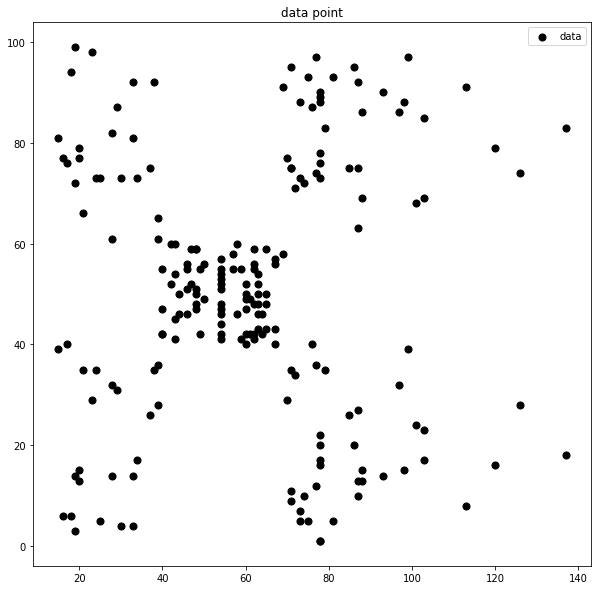

In [6]:
# plot the training data

plt.figure(1,figsize=(10,10))
plt.scatter(data[:,0], data[:,1], s=200, c='black', marker='.', label='data') 
plt.title('data point')
plt.legend()
plt.show()


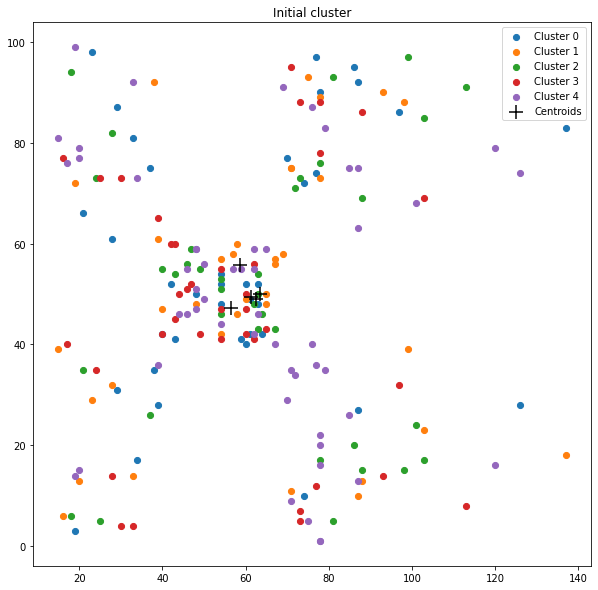

In [7]:
# initialize label randomly

init_label = []
for i in range(len(data)): #{
  init_label.append(np.random.randint(5))    
#}
init_0 = [j for j in range(len(init_label)) if init_label[j] == 0]
init_1 = [j for j in range(len(init_label)) if init_label[j] == 1]
init_2 = [j for j in range(len(init_label)) if init_label[j] == 2]
init_3 = [j for j in range(len(init_label)) if init_label[j] == 3]
init_4 = [j for j in range(len(init_label)) if init_label[j] == 4]
init_center = compute_centroid(data, init_label)

# Visualise the initial condition of the point labels

plt.figure(2,figsize=(10,10))
plt.scatter(data[init_0, 0], data[init_0, 1], s=150, marker='.', label='Cluster 0')
plt.scatter(data[init_1, 0], data[init_1, 1], s=150, marker='.', label='Cluster 1')
plt.scatter(data[init_2, 0], data[init_2, 1], s=150, marker='.', label='Cluster 2')
plt.scatter(data[init_3, 0], data[init_3, 1], s=150, marker='.', label='Cluster 3')
plt.scatter(data[init_4, 0], data[init_4, 1], s=150, marker='.', label='Cluster 4')
plt.scatter([i[0] for i in init_center], [i[1] for i in init_center], s=200, color='black', marker='+', label='Centroids')
plt.title('Initial cluster')
plt.legend()
plt.show()

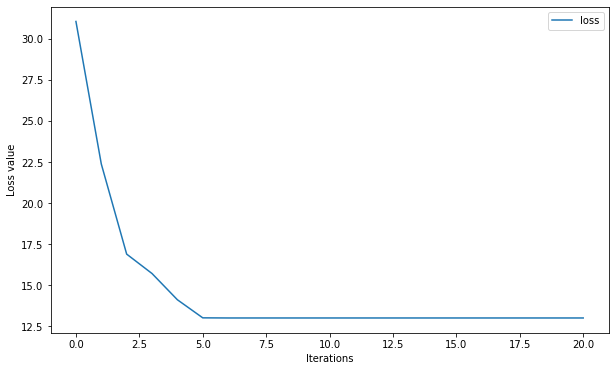

In [8]:
epoch = 20
loss = []

centroid0 = [init_center[0]]
centroid1 = [init_center[1]]
centroid2 = [init_center[2]]
centroid3 = [init_center[3]]
centroid4 = [init_center[4]]
init_loss = compute_loss(data, init_center, init_label)
loss.append(init_loss)
for i in range(epoch): #{
  label = []
  for j in range(len(data)): #{
      dist = []
      for m in range(k): #{
        dist.append(compute_distance(data[j], init_center[m])) 
        # print(data[j], init_center[m])
        # break       
      #}
      label.append(np.argmin(dist))
  #}
  init_center = compute_centroid(data, label)
  
  loss.append(compute_loss(data, init_center, label))
#}

# plot the loss curve
plt.figure(3, figsize=(10,6))
plt.plot(loss, label='loss')
plt.legend(loc=1)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

## Output using the dataset

## 1. Plot the training data [0.5pt]
<ht>

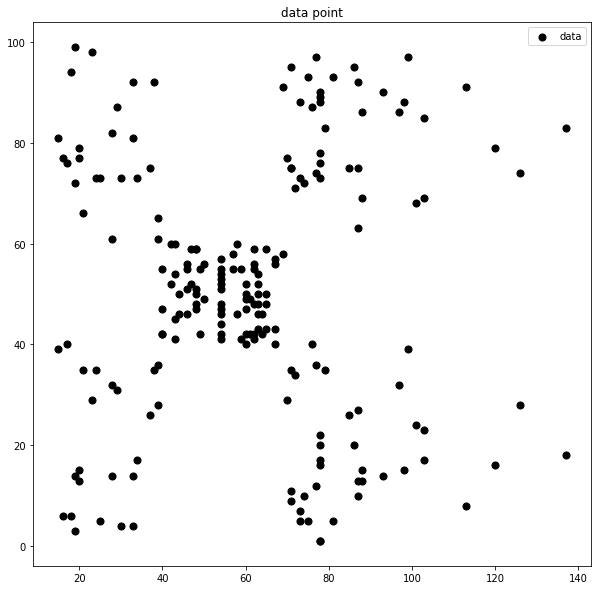

In [9]:
# plot the training data

plt.figure(1,figsize=(10,10))
plt.scatter(data[:,0], data[:,1], s=200, c='black', marker='.', label='data') 
plt.title('data point')
plt.legend()
plt.show()

## 2. Visualise the initial condition of the point labels [1pt]
<ht>

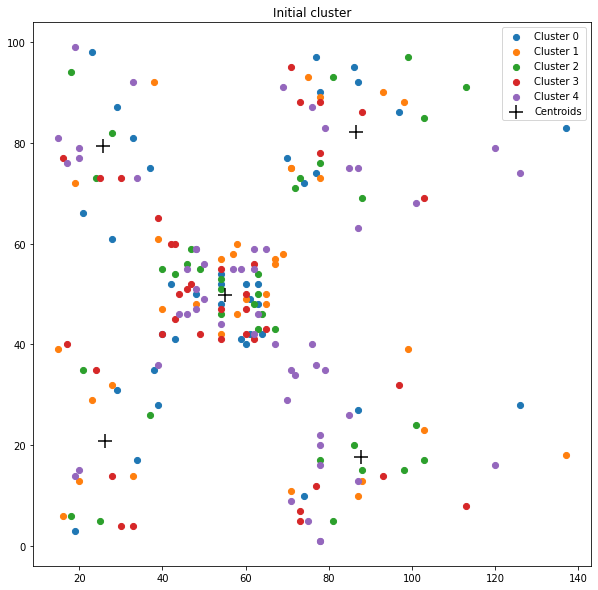

In [10]:
plt.figure(2,figsize=(10,10))
plt.scatter(data[init_0, 0], data[init_0, 1], s=150, marker='.', label='Cluster 0')
plt.scatter(data[init_1, 0], data[init_1, 1], s=150, marker='.', label='Cluster 1')
plt.scatter(data[init_2, 0], data[init_2, 1], s=150, marker='.', label='Cluster 2')
plt.scatter(data[init_3, 0], data[init_3, 1], s=150, marker='.', label='Cluster 3')
plt.scatter(data[init_4, 0], data[init_4, 1], s=150, marker='.', label='Cluster 4')
plt.scatter([i[0] for i in init_center], [i[1] for i in init_center], s=200, color='black', marker='+', label='Centroids')
plt.title('Initial cluster')
plt.legend()
plt.show()

## 3. Plot the loss curve [5pt]

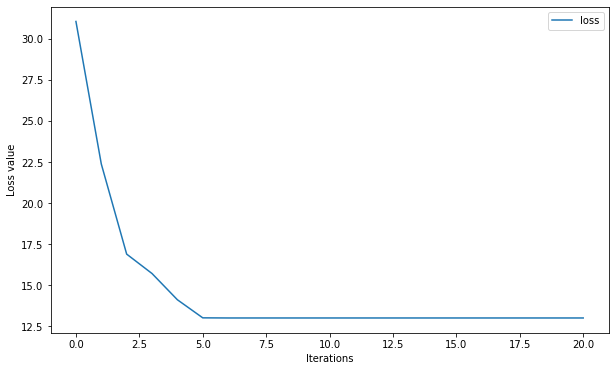

In [11]:
# plot the loss curve
plt.figure(3, figsize=(10,6))
plt.plot(loss, label='loss')
plt.legend(loc=1)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

## 4. Plot the centroid of each clsuter [5pt]

## 5. Plot the final clustering result [5pt]